In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation  
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  


In [2]:
pd.set_option('display.max_colwidth',200)

In [5]:
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [6]:
%matplotlib inline

In [105]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [258]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [107]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [108]:
train[train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


In [109]:
train[train['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [110]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [111]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [112]:
train_length=train['tweet'].str.len()

In [113]:
test_length=test['tweet'].str.len()

(array([6.370e+02, 1.634e+03, 2.810e+03, 3.148e+03, 3.501e+03, 4.868e+03,
        5.809e+03, 5.152e+03, 2.643e+03, 1.611e+03, 1.180e+02, 1.600e+01,
        9.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 11.  ,  24.15,  37.3 ,  50.45,  63.6 ,  76.75,  89.9 , 103.05,
        116.2 , 129.35, 142.5 , 155.65, 168.8 , 181.95, 195.1 , 208.25,
        221.4 , 234.55, 247.7 , 260.85, 274.  ]),
 <a list of 20 Patch objects>)

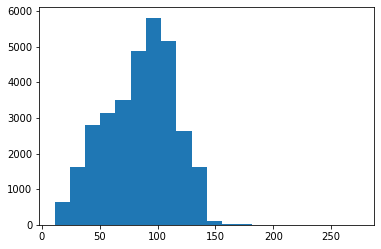

In [114]:
plt.hist(train_length,bins=20,label='train_tweets')

(array([4.090e+02, 1.055e+03, 1.702e+03, 1.923e+03, 2.054e+03, 3.351e+03,
        3.121e+03, 1.988e+03, 1.423e+03, 1.490e+02, 1.500e+01, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 11.  ,  25.05,  39.1 ,  53.15,  67.2 ,  81.25,  95.3 , 109.35,
        123.4 , 137.45, 151.5 , 165.55, 179.6 , 193.65, 207.7 , 221.75,
        235.8 , 249.85, 263.9 , 277.95, 292.  ]),
 <a list of 20 Patch objects>)

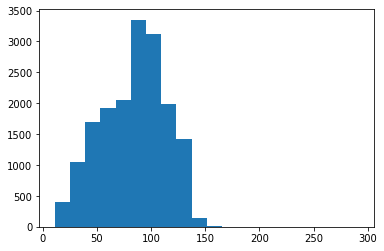

In [115]:
plt.hist(test_length,bins=20,label='test_tweets')

No handles with labels found to put in legend.


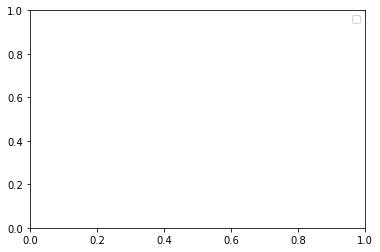

In [116]:
plt.legend()

In [117]:
plt.show()

In [118]:
??plt.hist

In [119]:
combi=train.append(test,ignore_index=True,sort=False)

In [120]:
combi

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation
...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
49156,49157,NaN,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
49157,49158,NaN,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [121]:
combi.shape

(49159, 3)

In [122]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt

In [123]:
import re

string = "at what time?"
match = re.sub("\s","!!!",input_txt)
print (match)

NameError: name 'input_txt' is not defined

In [124]:
s = 'one two one two one'

print(s.replace(' ', '-'))

one-two-one-two-one


In [125]:
print(s.replace(' ', ''))
# onetwoonetwoone

onetwoonetwoone


In [126]:
print(s.replace('one', 'XXX'))
# XXX two XXX two XXX

print(s.replace('one', 'XXX', 2))

XXX two XXX two XXX
XXX two XXX two one


In [127]:
s_lines = 'one\ntwo\nthree'
print(s_lines)
# one
# two
# three

print(s_lines.replace('\n', '-'))
# one-two-three

one
two
three
one-two-three


In [128]:
s = 'aaa@xxx.com bbb@yyy.com ccc@zzz.com'

print(re.sub('[a-z]*@', 'ABC@', s))
# ABC@xxx.com ABC@yyy.com ABC@zzz.com

ABC@xxx.com ABC@yyy.com ABC@zzz.com


In [129]:
print(re.sub('[a-z]*@', 'ABC@', s, 2))
# ABC@xxx.com ABC@yyy.com ccc@zzz.com

ABC@xxx.com ABC@yyy.com ccc@zzz.com


In [130]:
print(re.sub('[xyz]', '1', s))
# aaa@111.com bbb@111.com ccc@111.com

aaa@111.com bbb@111.com ccc@111.com


In [131]:
re.findall(' ','aditya gautam')

[' ']

In [132]:
re.sub(' ','','aditya gautam')

'adityagautam'

In [133]:
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],'@[\w]*')

In [134]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [135]:
combi['tidy_tweet']=combi['tidy_tweet'].str.replace('[^a-zA-Z#]'," ")

In [136]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [137]:
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [138]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [139]:
tokenized_tweet=combi['tidy_tweet'].apply(lambda x:x.split())

In [140]:
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [95]:
from nltk.stem.porter import *

In [101]:
x=[*range(5)]

In [102]:
print(*x)

0 1 2 3 4


In [103]:
stemmer=PorterStemmer()

In [141]:
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [143]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
combi['tidy_tweet']=tokenized_tweet

In [144]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [146]:
all_words=' '.join([text for text in combi['tidy_tweet']])

In [147]:
all_words

'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

In [148]:
from wordcloud import WordCloud

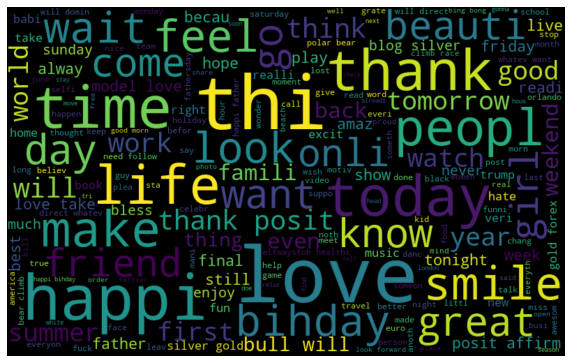

In [151]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [152]:
normal_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])

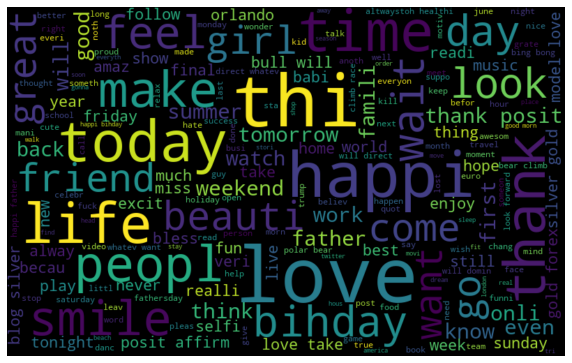

In [155]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

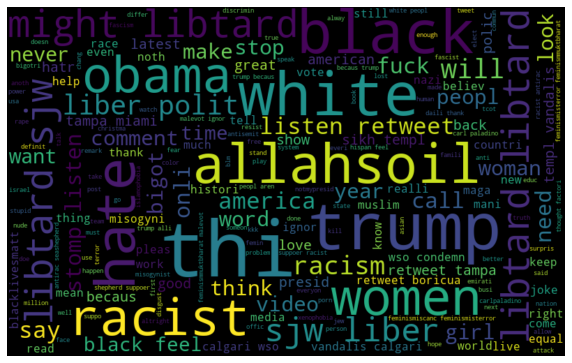

In [156]:
negative_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [157]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [192]:
HT_regular=hashtag_extract(combi['tidy_tweet'][combi['label']==0])
HT_negative=hashtag_extract(combi['tidy_tweet'][combi['label']==1])
HT_regular=sum(HT_regular,[])
HT_negative=sum(HT_negative,[])

In [159]:
a=[*range(10)]

In [173]:
a= [str(i) for i in a]

In [174]:
a

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [172]:
HT_negative

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc

In [185]:
x=[[i] for i in a]

In [186]:
x

[['0'], ['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']]

In [187]:
a=sum(x,[])

In [188]:
a

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

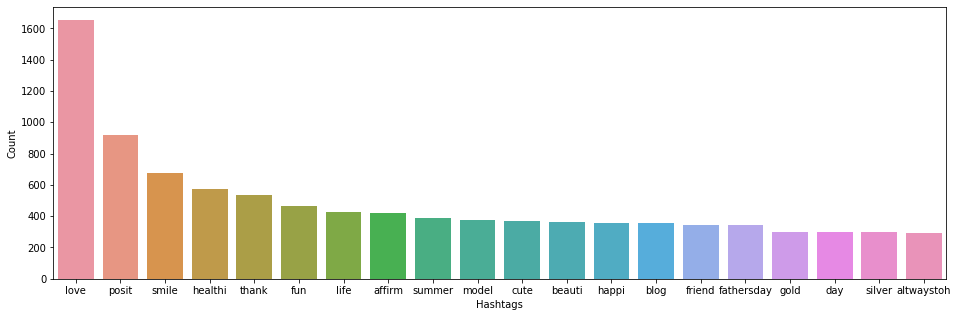

In [202]:
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'Hashtags':list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtags',y='Count')
ax.set(ylabel='Count')
plt.show()


In [198]:
y=sum([['x']],[])

In [199]:
y

['x']

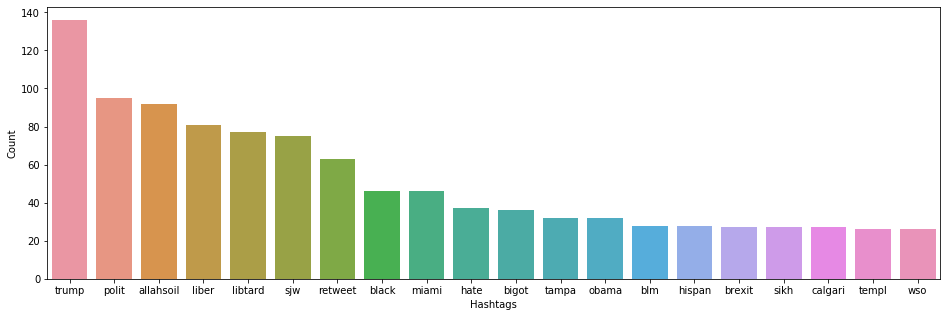

In [203]:
b=nltk.FreqDist(HT_negative)
e=pd.DataFrame({'Hashtags':list(b.keys()),'Count':list(b.values())})
e=e.nlargest(columns='Count',n=20)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e,x='Hashtags',y='Count')
ax.set(ylabel='Count')
plt.show()

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [206]:
bow_vectorizer=CountVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')

In [207]:
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [209]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.9,min_df=2,max_features=1000,stop_words='english')
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [224]:
tokenized_tweet=combi['tidy_tweet'].apply(lambda x:x.split())
model_w2v=gensim.models.Word2Vec(tokenized_tweet,size=200,window=5,min_count=2,sg=1,hs=0,negative=10,workers=2,seed=34)

In [225]:
model_w2v.train(tokenized_tweet,total_examples=len(combi['tidy_tweet']),epochs=20)

(6510028, 7536020)

In [230]:
model_w2v.wv.most_similar(positive='dinner')

[('#avocado', 0.5757633447647095),
 ('noodl', 0.5607194900512695),
 ('#cellar', 0.5604321956634521),
 ('spaghetti', 0.5600953698158264),
 ('#biall', 0.5589540600776672),
 ('cookout', 0.5464414358139038),
 ('fav', 0.5400100350379944),
 ('fizz', 0.538162350654602),
 ('spinach', 0.5366909503936768),
 ('melani', 0.5355061888694763)]

In [231]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5482609272003174),
 ('hillari', 0.5442115068435669),
 ('phoni', 0.5334596633911133),
 ('melo', 0.5205763578414917),
 ('unstabl', 0.5195232629776001),
 ('#delegaterevolt', 0.5189083814620972),
 ('jibe', 0.5163151025772095),
 ('unfavor', 0.5118359923362732),
 ('tomlin', 0.5117300748825073),
 ('embolden', 0.502146303653717)]

In [232]:
model_w2v['food']

array([ 4.50198799e-01,  4.49547142e-01, -3.76826525e-01,  1.30532548e-01,
        7.23489702e-01, -5.42760901e-02, -7.44063258e-01,  3.47656071e-01,
        1.82402700e-01, -8.48945901e-02, -1.14274882e-01, -1.67175040e-01,
        9.85304773e-01, -6.05976656e-02,  2.15414345e-01, -1.11600018e+00,
        8.66126716e-02,  1.73125789e-01,  2.00051174e-01,  5.07049024e-01,
       -2.77574807e-02,  6.30643964e-01, -7.15877116e-01, -6.34212852e-01,
        1.54551581e-01,  2.23756149e-01,  1.18477777e-01,  4.37617421e-01,
       -3.96772400e-02,  3.59244615e-01, -8.88420939e-02,  2.63696499e-02,
       -2.37909198e-01, -1.49539515e-01,  9.39399600e-02, -2.54063636e-01,
       -3.19280177e-01, -6.06615365e-01, -4.90695655e-01,  4.10576671e-01,
        1.57185763e-01,  4.47090894e-01,  1.70556366e-01, -4.57974486e-02,
       -4.65335429e-01,  1.13337629e-01, -1.97400734e-01, -2.72801459e-01,
        2.61868834e-01,  2.93210924e-01,  4.21211571e-01,  7.63406038e-01,
       -9.59486961e-02, -

In [233]:
len(model_w2v['food'])

200

In [237]:
model_w2v.wv.most_similar(positive='trump')

[('donald', 0.5482609272003174),
 ('hillari', 0.5442115068435669),
 ('phoni', 0.5334596633911133),
 ('melo', 0.5205763578414917),
 ('unstabl', 0.5195232629776001),
 ('#delegaterevolt', 0.5189083814620972),
 ('jibe', 0.5163151025772095),
 ('unfavor', 0.5118359923362732),
 ('tomlin', 0.5117300748825073),
 ('embolden', 0.502146303653717)]

In [238]:
def word_vector(tokens,size):
    vec=np.zeros(size).reshape((1,size))
    count=0
    for word in tokens:
        try:
            vec+=model_w2v[word].reshape((1,size))
            count+=1
        except KeyError:
            continue
    if count!=0:
        vec/=count
        return vec

In [241]:
wordvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:]=word_vector(tokenized_tweet[i],200)
    wordvec_df=pd.DataFrame(wordvec_arrays)


In [242]:
from tqdm import tqdm

In [244]:
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import LabeledSentence

C:\Users\ASUS\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [245]:
def add_label(twt):
    output=[]
    for i,s in zip(twt.index,twt):
        output.append(LabeledSentence(s,['tweet'+str(i)]))
    return output

labeled_tweets=add_label(tokenized_tweet)
        

In [246]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet5'])]

In [252]:
model_d2v=gensim.models.Doc2Vec(dm=1,dm_mean=1,vector_size=200,window=5,negative=7,min_counts=5,workers=5,alpha=0.1,seed=23)
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

100%|███████████████████████████████████████████████████████████████████████| 49159/49159 [00:00<00:00, 2236843.83it/s]


In [253]:
docvec_arrays=np.zeros((len(tokenized_tweet),200))
for i in range(len(combi)):
    docvec_arrays[i,:]=model_d2v.docvecs[i].reshape((1,200))

In [254]:
docvec_df=pd.DataFrame(docvec_arrays)
docvec_df.shape

(49159, 200)

In [256]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [257]:
# Extracting train and test BoW features

In [259]:
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

In [260]:
lreg=LogisticRegression()

In [261]:
lreg.fit(xtrain_bow,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [262]:
test_pred=lreg.predict_proba(test_bow)

In [263]:
test_pred_int=test_pred[:,1]>=0.3

In [264]:
test_pred_int=test_pred_int.astype(np.int)

In [266]:
test['label']=test_pred_int

In [267]:
submission=test[['id','label']]

In [268]:
submission.to_csv('sub_lreg_bow.csv',index=False)

In [269]:
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf,ytrain)
prediction=lreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5451327433628319

In [271]:
train_w2v=wordvec_df.iloc[:31962,:]
test_w2v=wordvec_df.iloc[31962:,:]
xtrain_w2v=train_w2v.iloc[ytrain.index,:]
xvalid_w2v=train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v,ytrain)
prediction=lreg.predict_prob(xvalid_w2v)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [273]:
from xgboost import XGBClassifier

In [274]:
xgb_model=XGBClassifier(max_depth=6,n_estimators=1000).fit(xtrain_bow,ytrain)
prediction=xgb_model.predict(xvalid_bow)
f1_score(yvalid,prediction)

0.5247706422018349

In [275]:
test_pred=xgb_model.predict(test_bow)

In [276]:
test['label']=test_pred

In [277]:
submission=test[['id','label']]


In [278]:
submission.to_csv('sub_xgb_bow.csv',index=False)

In [279]:
xgb=XGBClassifier(max_depth=6,n_estimators=1000).fit(xtrain_tfidf,ytrain)
prediction=xgb.predict(xvalid_tfidf)
f1_score(yvalid,prediction)

0.5394265232974911

In [281]:
xgb=XGBClassifier(max_depth=6,n_estimators=1000,nthread=3).fit(xtrain_w2v,ytrain)
f1_score(yvalid,prediction)

0.5394265232974911

In [ ]:
import xgboost as xgb